# Problem Set 4
## Part (a)

In [1]:
# importing libraries

from __future__ import division
import numpy as np
import numpy.linalg as la
import pandas as pd
import statsmodels.api as sm


#importing data
data = pd.read_table('./Brazil_1996PNAD.out');

# Drop observations with 0 earnings
data = data[data['MONTHLY_EARNINGS'] != 0];

# variables needed
data['LogEarn'] = np.log(data['MONTHLY_EARNINGS']);
data['AgeInDays2'] = data['AgeInDays']**2;

Y = data['LogEarn'];
X1 = data[['YRSSCH','AgeInDays','AgeInDays2']];
X1 = sm.add_constant(X1);
# OLS fit using statsmodels.OLS
OLS_result_a = sm.OLS(Y,X1).fit(cov_type='HC0');

print('\n')
print(OLS_result_a.summary())



/home/mathiew/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools




                            OLS Regression Results                            
Dep. Variable:                LogEarn   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                 1.770e+04
Date:                Fri, 08 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:41:34   Log-Likelihood:                -77088.
No. Observations:               66506   AIC:                         1.542e+05
Df Residuals:                   66502   BIC:                         1.542e+05
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8243      0.021    133.591      0

## Part (b)

In [2]:
# creating a set of dummy variables for years of schooling
data_dummy_yrs_sch = pd.get_dummies(data['YRSSCH'])
data = pd.concat([data, data_dummy_yrs_sch], axis=1)


In [3]:
Y = data['LogEarn'];
X1 = data[['AgeInDays','AgeInDays2',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]];

# OLS fit using statsmodels.OLS
OLS_result_b = sm.OLS(Y,X1).fit(cov_type='HC0');

print('\n')
print(OLS_result_b.summary())



                            OLS Regression Results                            
Dep. Variable:                LogEarn   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 08 Dec 2017   Prob (F-statistic):                nan
Time:                        15:41:38   Log-Likelihood:                -76641.
No. Observations:               66506   AIC:                         1.533e+05
Df Residuals:                   66488   BIC:                         1.535e+05
Df Model:                          17                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AgeInDays      0.0963      0.001     79.073      0

## Part (c)

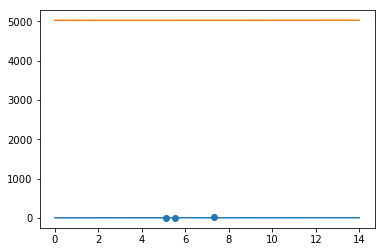

In [4]:
import matplotlib.pyplot as plt

data_age_40 = data[data['AgeInDays'] == 40];
X_plot = data_age_40['LogEarn'];
Y_plot = data_age_40['YRSSCH'];

plt.scatter(X_plot, Y_plot)


x_plot = np.arange(0,15,1);
y_plot_a = OLS_result_a.params[0] + OLS_result_a.params[1]*x_plot + OLS_result_a.params[2]*40 + OLS_result_a.params[3]*40*40;
y_plot_b = OLS_result_b.params[0]*40 + OLS_result_b.params[1]*40*40 + OLS_result_b.params[2]*(x_plot==0)+ OLS_result_b.params[3]*(x_plot==1)+ OLS_result_b.params[4]*(x_plot==2)+ OLS_result_b.params[5]*(x_plot==3)+ OLS_result_b.params[6]*(x_plot==4)+ OLS_result_b.params[7]*(x_plot==5) +  OLS_result_b.params[8]*(x_plot==6)+ OLS_result_b.params[9]*(x_plot==7) + OLS_result_b.params[10]*(x_plot==8)+ OLS_result_b.params[11]*(x_plot==9) + OLS_result_b.params[12]*(x_plot==10)+ OLS_result_b.params[13]*(x_plot==11) + OLS_result_b.params[14]*(x_plot==12)+ OLS_result_b.params[15]*(x_plot==13) + OLS_result_b.params[16]*(x_plot==14)+ OLS_result_b.params[17]*(x_plot==15) ;
plt.plot(x_plot,y_plot_a)

plt.plot(x_plot,y_plot_b)

plt.show()


## Part (d)

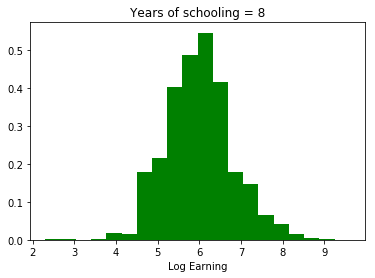

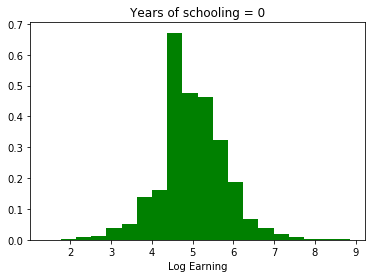

In [5]:
data_yrssch_8 = data[data['YRSSCH']==8];
data_yrssch_0= data[data['YRSSCH']==0];

y1 = data_yrssch_8['LogEarn'];
y2 = data_yrssch_0['LogEarn'];

n1, bins1, patches1 = plt.hist(y1, 20,normed=1, facecolor='green')
plt.xlabel('Log Earning')
plt.title('Years of schooling = 8')
plt.show()


n2, bins2, patches2 = plt.hist(y2, 20,normed=1, facecolor='green')
plt.xlabel('Log Earning')
plt.title('Years of schooling = 0')
plt.show()



The normalized log earning for years of schooling 8 and 0. The histograms are normalized with the total numbers in each category. It shows that on average the log of earning as years of schooling increases increases and shifts toward right. 

## Part e

In [12]:
# Breaking down the data for part e into different bins

data['status'] = pd.cut(data['AgeInDays'], bins=[20,25,30,35,40,45,50,55,60], labels=np.array('bin1 bin2 bin3 bin4 bin5 bin6 bin7 bin8'.split()))





,AgeInDays,YRSSCH,MONTHLY_EARNINGS,Father_NoSchool,Father_Incomplete1stPrimary,Father_Complete1stPrimary,Father_Incomplete2ndPrimary,Father_Complete2ndPrimary,Father_IncompleteSecondary,Father_CompleteSecondary,...,7,8,9,10,11,12,13,14,15,status
9,23.98083,4,1200,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
10,20.51198,8,550,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,bin1
22,23.31828,9,800,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,bin1
33,24.85695,8,600,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,bin1
40,23.93703,2,500,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
62,21.88364,4,172,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
84,24.20808,5,400,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
101,24.72279,1,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
106,20.01643,3,180,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,bin1
113,21.14716,12,490,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,bin1
